In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.To read the data set

In [112]:
data=pd.read_excel('iris.xls')

In [113]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## 2.Pre-Processing

In [13]:
data.shape

(150, 5)

<AxesSubplot:>

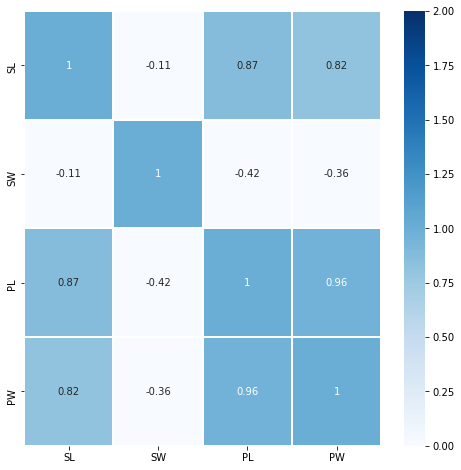

In [14]:
corrmatrix=data.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corrmatrix,vmin=0,vmax=2,annot=True,linewidth=0.2,cmap='Blues')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [17]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


> The Iris data consist of 150 rows and 5 columns.
> The data types includes float and object.
> It doesn't contains any missing values.
> From the statical summary table the mean and median of SL,SW,PL and PW are given by 5.84,5.8 for SL 3.05,3 for SW 
  3.75,4.35 for PL and 1.19,1.3 for PW respectively.

In [18]:
# to handle outliers
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

Text(0.5, 1.0, 'Boxplot of Sepal Length')

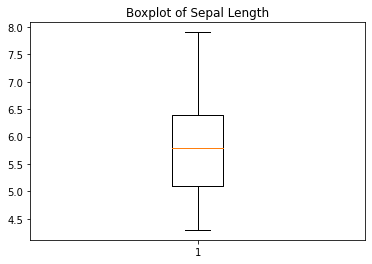

In [19]:
plt.boxplot(data['SL'])
plt.title('Boxplot of Sepal Length')

Text(0.5, 1.0, 'Boxplot of Sepal Width')

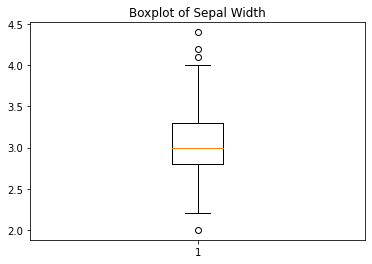

In [20]:
plt.boxplot(data['SW'])
plt.title('Boxplot of Sepal Width')

Text(0.5, 1.0, 'Boxplot of Petal Length')

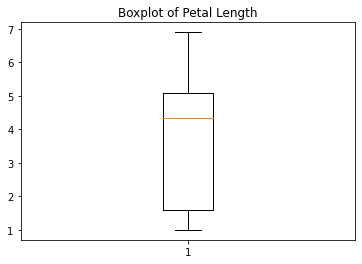

In [21]:
plt.boxplot(data['PL'])
plt.title('Boxplot of Petal Length')

Text(0.5, 1.0, 'Boxplot of Petal Width')

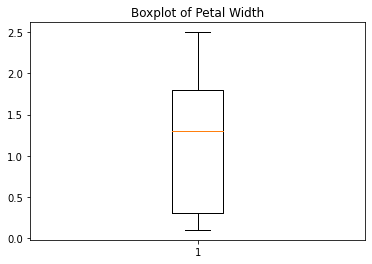

In [22]:
plt.boxplot(data['PW'])
plt.title('Boxplot of Petal Width')

> Here The boxplot of Sepal Width contains some outliers .We can use IQR to manage this outliers 

In [23]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [24]:
print(Q1,Q2,Q3)

2.8 3.0 3.3


In [25]:
data['SW'].median()

3.0

In [26]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [27]:
print(IQR)
print(low_lim)
print(up_lim)

0.5
2.05
4.05


In [28]:
outlier=[]
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [29]:
outlier

[4.4, 4.1, 4.2, 2.0]

In [30]:
ind1=data['SW']<low_lim
data.loc[ind1].index

Int64Index([60], dtype='int64')

Text(0.5, 1.0, 'Boxplot of Sepal Width')

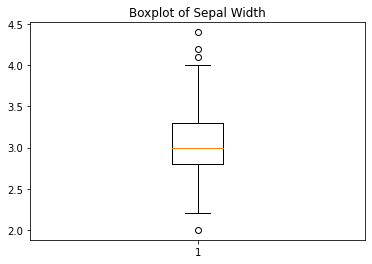

In [31]:
plt.boxplot(data['SW'])
plt.title('Boxplot of Sepal Width')

In [32]:
data.shape

(150, 5)

> Since The column SW contains an outlier it is negligble.
> Now the data reduced to 146 rows and 5 column.

In [34]:
 data.Classification.nunique()

3

In [35]:
#One hot encoding
data=pd.get_dummies(data)

In [36]:
data.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


<AxesSubplot:>

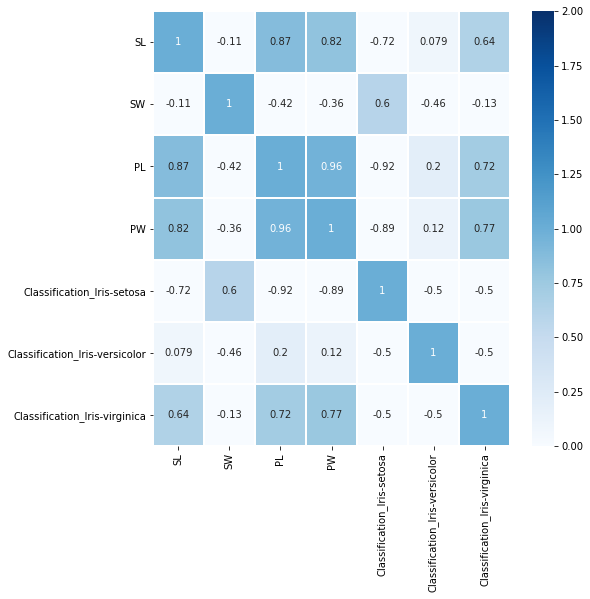

In [37]:
corrmatrix=data.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corrmatrix,vmin=0,vmax=2,annot=True,linewidth=0.2,cmap='Blues')

## 3.To find out which classification model gives the best result to predict iris species.

In [ ]:
# from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Classification']=label_encoder.fit_transform(data['Classification'])
data['Classification'].unique()  

In [82]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [83]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [84]:
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [85]:
data['Classification'].value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: Classification, dtype: float64

In [121]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [87]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [88]:
#sSplit the data into 80% training and 20% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [122]:
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

In [124]:
predictions=model.predict(x_test)
print(y_test)

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Classification, dtype: int64


In [125]:
print(predictions)

[ 1.2305166  -0.04088817  2.22162345  1.34972015  1.28607917  0.02346565
  1.05796175  1.82557039  1.37219259  1.06898774  1.6997677  -0.0725704
 -0.15476151 -0.06513544 -0.02320247  1.39524413  1.99939235  1.04970178
  1.28040501  1.97315432  0.03134273  1.59775615  0.09419949  1.91821542
  1.83026281  1.88002641  1.78919243  2.03257165  0.0373074   0.02643301]


In [126]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.037233644561975046


> Here the MSE is very low that means the distance from the points to the regression line is very small thus it shows that 
  our model is perfect.

## Logistic Regression

In [115]:
#Train the model
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [116]:
#Test the model
y_pred=logit_model.predict(x_test)

In [117]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [118]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='micro'))
print('Recall is:',recall_score(y_test,y_pred,average='micro'))
print('f1 is:',f1_score(y_test,y_pred,average='micro'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
f1 is: 1.0


In [119]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

## K-NN

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)

In [95]:
acc=accuracy_score(y_test,y_pred)
acc_values.append(acc)
acc_values

[1.0]

In [96]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

## SVM

In [97]:
df0=data[data.Classification==0]
df1=data[data.Classification==1]
df2=data[data.Classification==2]

Text(0, 0.5, 'Sepal Width')

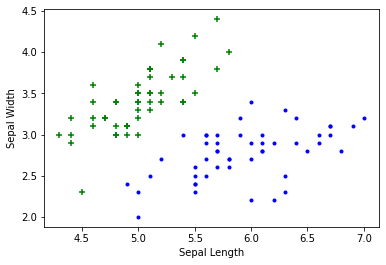

In [98]:
plt.scatter(df0['SL'],df0['SW'],color='green',marker='+')
plt.scatter(df1['SL'],df1['SW'],color='blue',marker='.')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

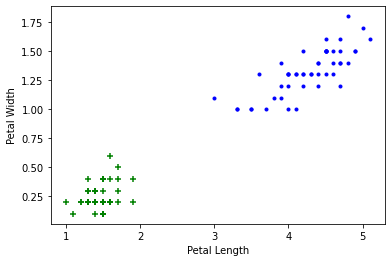

In [99]:
plt.scatter(df0['PL'],df0['PW'],color='green',marker='+')
plt.scatter(df1['PL'],df1['PW'],color='blue',marker='.')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [100]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [102]:
len(x_train)

120

In [103]:
len(x_test)

30

In [104]:
from sklearn.svm import SVC

In [105]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print('Accuracy using linear SVM is:',accuracy_score(y_test,y_pred))

Accuracy using linear SVM is: 1.0


# Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [107]:
model.score(x_test,y_test)

1.0

In [108]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [109]:
from sklearn.metrics import f1_score,confusion_matrix
f1_score(y_test,y_pred,average='micro')

1.0

In [110]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(69.0, 0.5, 'Truth')

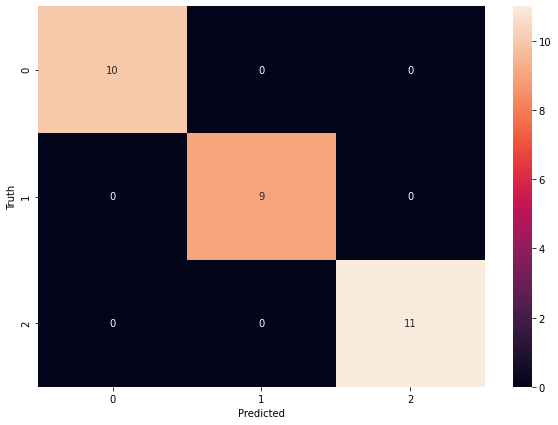

In [111]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

> From the heatmap we can see that there is 10 times zero and it predicted like it correctly.
>From the Logistic regression,K-NN,SVM and Random forest we get accuracy value 1 ,it means the model is good because the data 
 is perfect.